In [2]:
import numpy as np
def J(theta):
    y_hat = sigmoid(X_b.dot(theta))
def sigmoid(x):
    return  1. / (1. + np.exp(-x))#np.exp函数



In [13]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)
a.dot(b)
a*b
np.shape(a)

(3,)

In [15]:
a.dot(2)

array([2, 4, 6])

In [10]:
np.random.rand(3)

array([0.20673915, 0.27432006, 0.50494002])

In [13]:
np.random.randn(3)#

array([ 0.36014271, -0.87201629,  0.2959345 ])

In [2]:
a = ''
a,b = '1',a
print("a",a,'b',b)

a 1 b 


d:\Apps\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


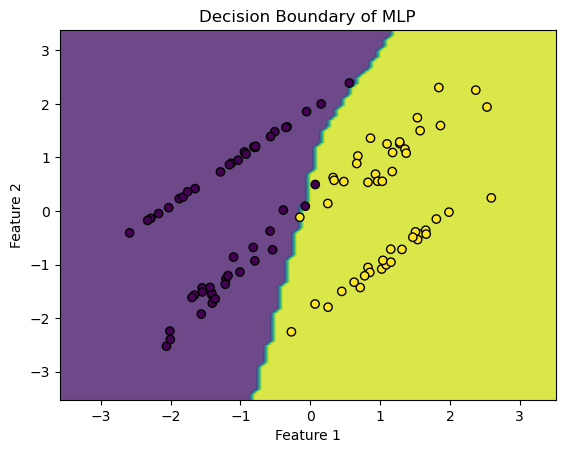

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

# 生成模拟数据
#X, y = make_classification(n_samples=100, n_features=2,n_classes=2, n_clusters_per_class=1, random_state=42)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_informative=2, random_state=42)

# 训练MLP模型
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X, y)

# 确定绘图范围
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 生成网格点
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 对网格点进行预测
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of MLP')
plt.show()


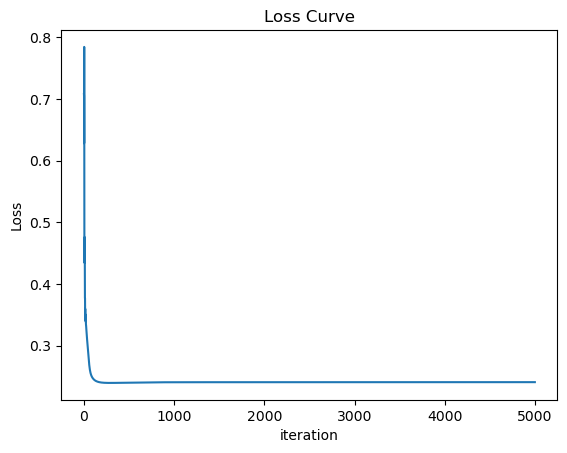

(3660,)
(60, 61)


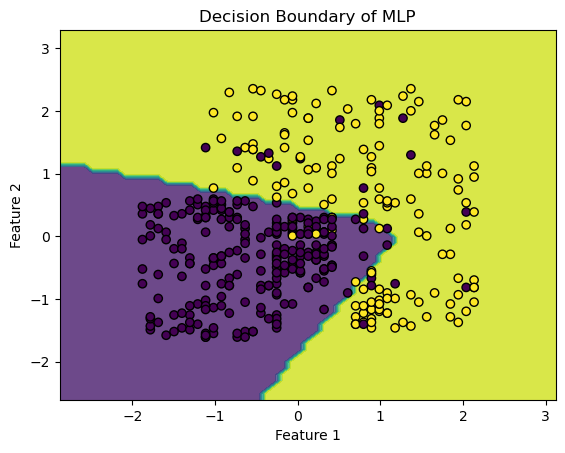

输入层到隐含层权值:
 [[ 3.19948387  5.14454696]
 [13.32950309 -3.32209604]]
输入层到隐含层偏置：
 [-5.74391518 -5.95526265]
隐含层到输出层权值：
 [[5.46481847]
 [6.60572916]]
隐含层到输出层偏置：
 [-3.80021366]
输出结果:
 [[0.02188159]
 [0.03716639]
 [0.0218924 ]
 [0.02188304]
 [0.02189071]
 [0.02188246]
 [0.02590745]
 [0.84085569]
 [0.0219025 ]
 [0.02206064]
 [0.02247074]
 [0.02188293]
 [0.02287587]
 [0.02561292]
 [0.02198821]
 [0.02338218]
 [0.9236245 ]
 [0.87671502]
 [0.89630272]
 [0.92563202]
 [0.90111955]
 [0.63527328]
 [0.87756995]
 [0.90111955]
 [0.91617808]
 [0.93149213]
 [0.93369037]
 [0.90975765]
 [0.02194706]
 [0.02411595]
 [0.02214583]
 [0.84085563]
 [0.02189554]
 [0.02191549]
 [0.0827705 ]
 [0.02895065]
 [0.02413268]
 [0.0219407 ]
 [0.02190288]
 [0.02196172]
 [0.02221266]
 [0.02210862]
 [0.84070918]
 [0.02370158]
 [0.02744673]
 [0.0219112 ]
 [0.0221712 ]
 [0.02188527]
 [0.84085571]
 [0.19879511]
 [0.02189393]
 [0.02187647]
 [0.02696127]
 [0.03279207]
 [0.02188246]
 [0.02187808]
 [0.02187846]
 [0.02261911]
 [0.02190

In [55]:
import numpy as np
import matplotlib.pyplot as plt

rate=0.1 #学习率
sample_num=400 #样本数据量
def read_csv(path):
    data = np.loadtxt(open(path,"rb"),delimiter=",",skiprows=1,usecols=range(3))
    X = data[:,0:-1]
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])#归一化
    #X = np.insert(X, len(X[0]), 1, axis=1)#最后一列全插入1

    '''np.insert()函数的参数如下：
    X：要插入值的输入数组。
    0：要插入的位置索引。在这种情况下，0表示要在数组的开头插入值。
    1：要插入的值。在这种情况下，插入的值是1。
    axis=1：指定要插入值的轴。axis=1表示在数组的列维度上插入。
    '''
    class_label = data[:,-1]
    class_label = np.expand_dims(class_label, axis=1)
    return X,class_label
class my_mlp:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.normal(size=(input_size, hidden_size))#输入层到隐藏层
        self.w2 = np.random.normal(size=(hidden_size,output_size))#隐藏层到输出层
        self.b1 = np.random.normal(size=(hidden_size))
        self.b2 = np.random.normal(size=(output_size))
        self.h_out = np.zeros(1)
        self.out = np.zeros(1)

    @staticmethod
    def sigmoid(x):
        '''sigmoid函数作为激活函数'''
        return 1 / (1 + np.exp(-x))
    @staticmethod
    def d_sigmoid(x):
        '''相对误差对输出和隐含层求导'''
        return x * (1 - x)
    def forward(self,input):
        # print(np.shape(input),np.shape(self.w1),np.shape(self.w2))
        # print(np.shape(np.dot(input,self.w1)))
        self.h_out = my_mlp.sigmoid(np.dot(input, self.w1)+self.b1)
        self.out = my_mlp.sigmoid(np.dot(self.h_out, self.w2)+self.b2)
        return self.out
        
    def backpropagation(self,input,output,lr=rate):
        self.forward(input)
        # print(np.shape(output))
        # print(np.shape(self.out))
        #求对层输出的梯度
        L2_delta=(output-self.out) * my_mlp.d_sigmoid(self.out)
        # print(np.shape(L2_delta))
        L1_delta = L2_delta.dot(self.w2.T) * my_mlp.d_sigmoid(self.h_out)
        #求对参数的梯度
        d_w2 = rate * self.h_out.T.dot(L2_delta)
        d_w1 = rate * input.T.dot(L1_delta)
        self.w2 += d_w2
        self.w1 += d_w1
        d_b2 = np.ones((1,sample_num)).dot(L2_delta)
        d_b1 = np.ones((1,sample_num)).dot(L1_delta)
        self.b2 += rate*d_b2.reshape(d_b2.shape[0]*d_b2.shape[1],)
        self.b1 += rate*d_b1.reshape(d_b1.shape[0]*d_b1.shape[1],)
def draw_decision_boundaries(X,y,mlp):
    # 确定绘图范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 生成网格点
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    print(np.shape(xx.ravel()))
    print(np.shape(yy))
    # 对网格点进行预测
    Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z > 0.5, 1, 0)
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of MLP')
    plt.show()

if __name__ == '__main__':
    mlp=my_mlp(2,2,1)
    # x_data x1,x2
    x_data = read_csv("data/data.csv")[0]
    y_data = read_csv("data/data.csv")[1]
    losses = []
    accuracy = []
    for i in range(5000):
        mlp.backpropagation(x_data,y_data)
        out=mlp.out  # 更新权值
        loss = -np.mean(y_data*np.log(out)+(1-y_data)*np.log(1-out))
        
        # if i % 500 == 0:
        #     plt.scatter(i, np.mean(np.abs(y_data - out)))
        losses.append(loss)
        accuracy.append(out>=0.5)==y_data
            #print('当前误差:',np.mean(np.abs(y_data - out)))
    plt.plot(losses)
    plt.title('Loss Curve')
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.show()
    draw_decision_boundaries(x_data,y_data,mlp)
    print('输入层到隐含层权值:\n',mlp.w1)
    print('输入层到隐含层偏置：\n',mlp.b1)
    print('隐含层到输出层权值：\n',mlp.w2)
    print('隐含层到输出层偏置：\n',mlp.b2)

    print('输出结果:\n',out)
    print('忽略误差近似输出:')
    for i in out:
        print(0 if i<=0.5 else 1)
